In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
 data.shape

(200, 5)

In [5]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
print(data.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [9]:
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [10]:
print(X.head())
print(X.dtypes)

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
k
    


10

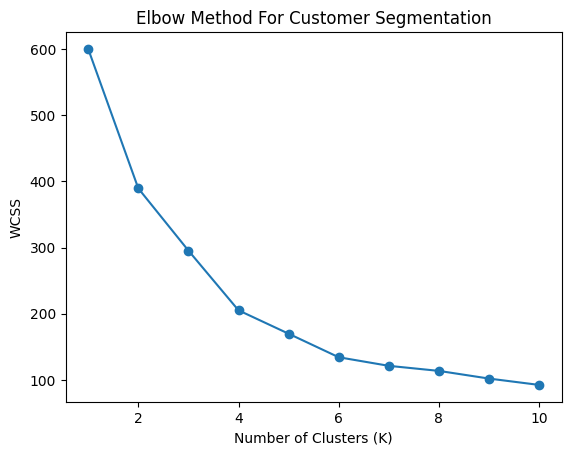

In [14]:
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method For Customer Segmentation")
plt.show()

In [15]:
k = 10 # elbow graph se select
model = KMeans(n_clusters=k, random_state=42)
model.fit(X_scaled)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
pickle.dump(model, open("kmeans_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

"Model ained & Saved Successfully!"


'Model ained & Saved Successfully!'